In [339]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import hadamard
import scipy.signal
import pylab
from scipy.misc import derivative

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(abs(x))

# let's try this with FFT

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (30,10), sharey='row')
nffts = 2**22
num_samples = 1024
variance = 1
gain = 1


pwrsreg = []
pwrsnoise = []

for i in range(nffts):
    samples = gain*np.random.normal(0, np.sqrt(variance), num_samples) + np.random.normal(0, np.sqrt(1000*variance), num_samples)
    fftavg = np.fft.fft(samples)/num_samples
    pwr = fftavg*np.conj(fftavg)
    pwrsnoise.append(pwr)
    
for i in range(nffts):
    samples = gain*np.random.normal(0, np.sqrt(variance), num_samples)
    fftavg = np.fft.fft(samples)/num_samples
    pwr = fftavg*np.conj(fftavg)
    pwrsreg.append(pwr)


meanpwrreg = np.mean(pwrsreg, axis=0)
meanpwrnoise = np.mean(pwrsnoise, axis=0)

fig.suptitle('No Walsh', fontsize=15)

ax[0,0].plot(pwrsreg[0],label='No Additive Noise')
ax[0,0].plot(pwrsnoise[0],label='Additive Noise')
ax[0,0].set_title('No Average Correlation')

ax[0,1].plot(meanpwrreg,label='No Additive Noise')
ax[0,1].plot(meanpwrnoise,label='Additive Noise')
ax[0,1].set_title('Average (Correlation)')

ax[1,0].plot(db(pwrsreg[0]),label='No Additive Noise')
ax[1,0].plot(db(pwrsnoise[0]),label='Additive Noise')
ax[1,0].set_title('No Average db(Correlation)')
            
ax[1,1].plot(db(meanpwrreg),label='No Additive Noise')
ax[1,1].plot(db(meanpwrnoise),label='Additive Noise')
ax[1,1].set_title('Average db(Correlation)')
plt.legend()

(-9.053344813392437e-05+1.503483481376383e-20j)
0.6991823068537019


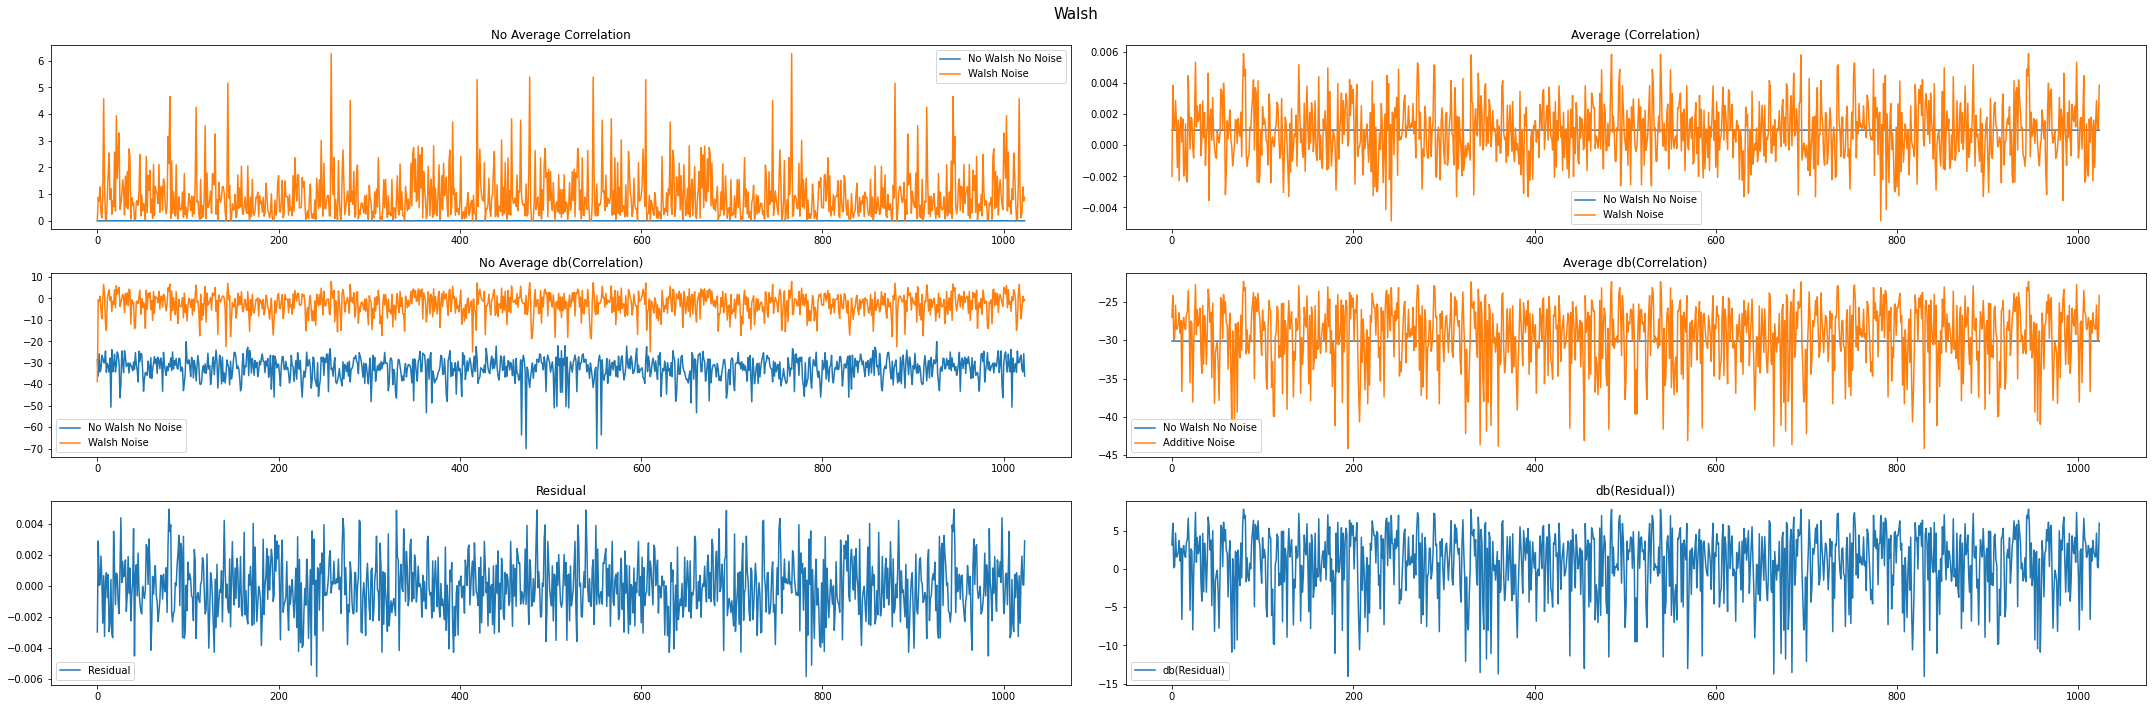

In [344]:
fig, ax = plt.subplots(3,2, figsize = (30,10))
nffts = 2**18
num_samples = 1024
variance = 1


pwrspre = []
pwrspost = []

for i in range(nffts):
    if i < nffts//2:    
        samplessig = gain*(np.random.normal(0, np.sqrt(variance), num_samples))
        samplesnoise = np.random.normal(0, np.sqrt(1000*variance), num_samples)
        nowalsh = samplessig+samplesnoise
        walsh = samplessig+samplesnoise
        fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
        fftavgwalsh = np.fft.fft(walsh)/num_samples
        pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
        pwrwalsh = fftavgwalsh*np.conj(fftavgwalsh)
        pwrspre.append(pwrnowalsh)
        pwrspost.append(pwrwalsh)
    else:
        samplessig = gain*np.random.normal(0, np.sqrt(variance), num_samples)
        samplesnoise = np.random.normal(0, np.sqrt(1000*variance), num_samples)
        nowalsh =  samplessig+samplesnoise
        walsh = -(-samplessig+samplesnoise)
        fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
        fftavgwalsh = np.fft.fft(walsh)/num_samples
        pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
        pwrwalsh = fftavgwalsh*np.conj(fftavgnowalsh)
        pwrspre.append(pwrnowalsh)
        pwrspost.append(pwrwalsh)

pwrsreg = []
for i in range(nffts):
    samples = gain*np.random.normal(0, np.sqrt(variance), num_samples)
    fftavg = np.fft.fft(samples)/num_samples
    pwr = fftavg*np.conj(fftavg)
    pwrsreg.append(pwr)
    
meanpwreg = np.mean(pwrsreg, axis=0)
meanpwrpre = np.mean(pwrspre, axis=0)
meanpwrpost = np.mean(pwrspost, axis=0)

fig.suptitle('Walsh', fontsize=15)

ax[0,0].plot(pwrsreg[0],label='No Walsh No Noise')
#ax[0,0].plot(pwrspre[0],label='No Walsh Noise')
ax[0,0].plot(pwrspost[0],label= 'Walsh Noise')
ax[0,0].set_title('No Average Correlation')
ax[0,0].legend()

ax[0,1].plot(meanpwreg,label='No Walsh No Noise')
#ax[0,1].plot(meanpwrpre,label='No Walsh Noise')
ax[0,1].plot(meanpwrpost,label= 'Walsh Noise')
ax[0,1].set_title('Average (Correlation)')
ax[0,1].legend()

ax[1,0].plot(db(pwrsreg[0]),label='No Walsh No Noise')
#ax[1,0].plot(db(pwrspre[0]),label='No Walsh Noise')
ax[1,0].plot(db(pwrspost[0]),label= 'Walsh Noise')
ax[1,0].set_title('No Average db(Correlation)')
ax[1,0].legend()

ax[1,1].plot(db(meanpwrreg),label='No Walsh No Noise')
#ax[1,1].plot(db(meanpwrpre),label='No Additive Noise')
ax[1,1].plot(db(meanpwrpost),label='Additive Noise')
ax[1,1].set_title('Average db(Correlation)')
ax[1,1].legend()




ax[2,0].plot(meanpwrpost-meanpwrreg,label='Residual')
ax[2,0].set_title('Residual')
ax[2,0].legend()

ax[2,1].plot(db(meanpwrpost)-db(meanpwrreg),label='db(Residual)')
ax[2,1].set_title('db(Residual))')
ax[2,1].legend()

plt.tight_layout()
print(np.mean(meanpwrpost-meanpwrreg))
print(np.mean(db(meanpwrpost)-db(meanpwrreg)))

#

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (30,10))
nffts = 2**18
num_samples = 1024
variance_fixed = 1
variances = np.linspace(.1,1000,100)


prepwr = []
postpwr = []
pwrsorig = []

for j in range(len(variances)):
    pwrspre = []
    pwrspost = []
    pwrsreg = []
    for i in range(nffts):
        if i < nffts//2:    
            samplessig = np.random.normal(0, np.sqrt(variance_fixed), num_samples)
            samplesnoise = np.random.normal(0, np.sqrt(variances[j]), num_samples)
            nowalsh =  samplessig+samplesnoise
            walsh = samplessig+samplesnoise
            fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
            fftavgwalsh = np.fft.fft(walsh)/num_samples
            pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
            pwrwalsh = fftavgwalsh*np.conj(fftavgnowalsh)
            pwrspre.append(pwrnowalsh)
            pwrspost.append(pwrwalsh)
        else:
            samplessig = gain*np.random.normal(0, np.sqrt(variance_fixed), num_samples)
            samplesnoise = np.random.normal(0, np.sqrt(variances[j]), num_samples)
            nowalsh =  samplessig+samplesnoise
            walsh = samplessig-samplesnoise
            fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
            fftavgwalsh = np.fft.fft(walsh)/num_samples
            pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
            pwrwalsh = fftavgwalsh*np.conj(fftavgnowalsh)
            pwrspre.append(pwrnowalsh)
            pwrspost.append(pwrwalsh)
        

        samples = gain*np.random.normal(0, np.sqrt(variance_fixed), num_samples)
        fftavg = np.fft.fft(samples)/num_samples
        pwr = fftavg*np.conj(fftavg)
    
        pwrsreg.append(pwr)
            
    meanpwrpre = np.mean(pwrspre, axis=0)
    meanpwrpost = np.mean(pwrspost, axis=0)
    meanpwrreg = np.mean(pwrsreg, axis=0)
    
    prepwr.append(np.mean(meanpwrpre))
    postpwr.append(np.mean(meanpwrpost))
    pwrsorig.append(np.mean(meanpwrreg))


fig.suptitle('Walsh', fontsize=15)

prepwr = np.array(prepwr)
postpwr = np.array(postpwr)
pwrsorig = np.array(pwrsorig)



ax[0,0].plot(variances, pwrsorig,label='No Walsh No Noise')
#ax[0,0].plot(variances, prepwr,label='No Walsh Noise')
ax[0,0].plot(variances, postpwr,label= 'Walsh Noise')
ax[0,0].set_title('Average (Correlation)')
ax[0,0].legend()



ax[0,1].plot(variances,db(pwrsorig),label='No Walsh No Noise')
#ax[0,1].plot(variances,db(prepwr),label='No Walsh Noise')
ax[0,1].plot(variances,db(postpwr),label='Walsh Noise')
ax[0,1].set_title('Average db(Correlation)')
ax[0,1].legend()



ax[1,0].plot(variances,postpwr-pwrsorig,label='Residual')
ax[1,0].set_title('Residual')
ax[1,0].legend()

ax[1,1].plot(variances,db(postpwr)-db(pwrsorig),label='Residual dB')
ax[1,1].set_title('Residual dB')
ax[1,1].legend()

# Amplitude Issue?

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (30,10))
nffts = 2**18
num_samples = 1024
variance = 1



pwrspre = []
pwrspost = []
for i in range(nffts):
    if i < nffts//2:    
        samplessig = gain*(np.random.normal(0, np.sqrt(variance), num_samples))
        samplesnoise = np.random.normal(0, np.sqrt(100*variance), num_samples)
        nowalsh = samplessig+samplesnoise
        walsh =  -(-samplessig+samplesnoise)
        fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
        fftavgwalsh = np.fft.fft(walsh)/num_samples
        pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
        pwrwalsh = fftavgwalsh*np.conj(fftavgnowalsh)
        pwrspre.append(pwrnowalsh)
        pwrspost.append(pwrwalsh)
    else:
        samplessig = gain*np.random.normal(0, np.sqrt(variance), num_samples)
        samplesnoise = np.random.normal(0, np.sqrt(100*variance), num_samples)
        nowalsh =  samplessig+samplesnoise
        walsh = -(-samplessig+samplesnoise)
        fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
        fftavgwalsh = np.fft.fft(walsh)/num_samples
        pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
        pwrwalsh = fftavgwalsh*np.conj(fftavgnowalsh)
        pwrspre.append(pwrnowalsh)
        pwrspost.append(pwrwalsh)

pwrsreg = []
for i in range(nffts):
    samples = gain*np.random.normal(0, np.sqrt(variance), num_samples)
    fftavg = np.fft.fft(samples)/num_samples
    pwr = fftavg*np.conj(fftavg)
    pwrsreg.append(pwr)
    
meanpwreg = np.mean(pwrsreg, axis=0)
meanpwrpre = np.mean(pwrspre, axis=0)
meanpwrpost = np.mean(pwrspost, axis=0)

fig.suptitle('Walsh', fontsize=15)

#ax[0,0].plot(pwrsreg[0],label='No Walsh No Noise')
ax[0,0].plot(pwrspre[0],label='No Walsh Noise')
ax[0,0].plot(pwrspost[0],label= 'Walsh Noise')
ax[0,0].set_title('No Average Correlation')
ax[0,0].legend()

#ax[0,1].plot(meanpwreg,label='No Walsh No Noise')
ax[0,1].plot(meanpwrpre,label='No Walsh Noise')
ax[0,1].plot(meanpwrpost,label= 'Walsh Noise')
ax[0,1].set_title('Average (Correlation)')
ax[0,1].legend()

#ax[1,0].plot(db(pwrsreg[0]),label='No Walsh No Noise')
ax[1,0].plot(db(pwrspre[0]),label='No Walsh Noise')
ax[1,0].plot(db(pwrspost[0]),label= 'Walsh Noise')
ax[1,0].set_title('No Average db(Correlation)')
ax[1,0].legend()

#ax[1,1].plot(db(meanpwrreg),label='No Walsh No Noise')
ax[1,1].plot(db(meanpwrpre),label='No Additive Noise')
ax[1,1].plot(db(meanpwrpost),label='Additive Noise')
ax[1,1].set_title('Average db(Correlation)')
ax[1,1].legend()


ax[2,0].plot(pwrspre[0]-pwrspost[0],label='Suppression Power')
ax[2,0].set_title('No Average Suppression Power')
ax[2,0].legend()

ax[3,0].plot(db(pwrspre[0])-db(pwrspost[0]),label='Suppression Power (dB)')
ax[3,0].set_title('No Average db(Suppression Power)')
ax[3,0].legend()


ax[2,1].plot(meanpwrpre-meanpwrpost,label='Suppression Power')
ax[2,1].set_title('Average Suppression Power')
ax[2,1].legend()

ax[3,1].plot(db(meanpwrpre)-db(meanpwrpost),label='Suppression Power')
ax[3,1].set_title('Average db(Suppression Power)')
ax[3,1].legend()

plt.tight_layout()

# Band Limited

In [ ]:
from scipy.signal import butter, lfilter
from numpy.fft import fft, fftfreq

# Parameters
sample_rate = 250  # Sampling rate in MHz
duration = 1.0  # Duration in seconds
freq_range = (70, 100)  # Frequency range in MHz

# Generate time vector
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate white noise
white_noise = np.random.normal(0, 1, len(t))

# Design a bandpass filter
nyquist = 0.5 * sample_rate
low = freq_range[0] / nyquist
high = freq_range[1] / nyquist
b, a = butter(4, [low, high], btype='band')

band_limited_noise = lfilter(b, a, white_noise)

# Compute FFT for the original white noise
fft_white_noise = fft(white_noise)
freqs_white_noise = fftfreq(len(t), 1 / sample_rate)

# Compute FFT for the band-limited white noise
fft_band_limited_noise = fft(band_limited_noise)
freqs_band_limited_noise = fftfreq(len(t), 1 / sample_rate)
